# 1.1 DECOUVERTE DU DATAFRAME
---
# APRES 2 BONNES HEURES DE RECHERCHE, JE CHOISI UN DATASET PLUTOT POPULAIRE QUI ME SEMBLE INTERESSANT POUR EFFECTUER UNE PREDICTION PAR REGRESSION LINEAIRE, IL Y A TOUTEFOIS UNE PROBLEMATIQUE, CE DATASET NE CONTIENT QUE DES VALEURS CATEGORIQUES EN DEHORS DU SALAIRE, QUI SERA MA TARGET. 
# VAIS-JE ARRIVER À UN RESULTAT CONCLUANT ?
# JE COMMENCE PAR CHARGER MON CSV AVEC PANDA


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('csv/ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


# J'EFFECTUE LES METHODES DE BASES POUR AVOIR UNE VISION LARGE DE MON DATAFRAME

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


# 1.2 NETTOYAGE DES DONNÉES.
---


# TRÈS VITE, JE SUIS CONFRONTÉ A DES FORMAT DE DONNÉES QUI VONT ME GENER POUR LA COMPREHENSION DU DATASET
# IL S'AGIT D'UN FORMAT ISO POUR LES PAYS (DE => ALLEMAGNE, FR => FRANCE etc...)
# JE FOUILLE UN PEU SUR INTERNET, ET JE TROUVE UN CSV SUR GITHUB QUI ASSOCIE LE NOM DU PAYS À SON CODE ISO
# JE DÉCIDE DONC DE MERGER MON CSV AVEC CELUI-CI POUR REMPLACER LES CODE ISO DES PAYS PAR LE NOM DE CE PAYS DANS MON DATAFRAME PRINCIPAL

# JE DECIDE EGALEMENT DE SUPPRIMER LES COLONNES 'salary' ET 'salary_currency' POUR NE GARDER QUE LA COLONNE DU SALAIRE EN DOLLARS ('salary_in_usd')

In [5]:
df_country_name = pd.read_csv('csv/slim-2.csv')
df_country_name
df_work = pd.merge(df, df_country_name, left_on='employee_residence', right_on='alpha-2')
df_work.rename(columns={'name': 'employee_country_residence'}, inplace=True)
df_work = pd.merge(df_work, df_country_name, left_on='company_location', right_on='alpha-2')
df_work.rename(columns={'name': 'company_country_location'}, inplace=True)
df_work_clean = df_work[['work_year','experience_level','employment_type', 'job_title','company_size', 'salary_in_usd', "employee_country_residence", 'remote_ratio', 'company_country_location']]
df_work

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employee_country_residence,alpha-2_x,country-code_x,company_country_location,alpha-2_y,country-code_y
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Germany,DE,276,Germany,DE,276
1,30,2020,MI,FT,Data Engineering Manager,51999,EUR,59303,DE,100,DE,S,Germany,DE,276,Germany,DE,276
2,45,2020,EN,PT,ML Engineer,14000,EUR,15966,DE,100,DE,S,Germany,DE,276,Germany,DE,276
3,55,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,100,DE,M,Germany,DE,276,Germany,DE,276
4,65,2020,EN,FT,Data Scientist,55000,EUR,62726,DE,50,DE,S,Germany,DE,276,Germany,DE,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,501,2022,MI,FT,Head of Data,30000,EUR,32974,EE,100,EE,S,Estonia,EE,233,Estonia,EE,233
603,503,2022,MI,FT,Machine Learning Engineer,121000,AUD,87425,AU,100,AU,L,Australia,AU,36,Australia,AU,36
604,505,2022,EN,FT,Data Scientist,120000,AUD,86703,AU,50,AU,M,Australia,AU,36,Australia,AU,36
605,510,2022,EN,FT,Computer Vision Software Engineer,150000,USD,150000,AU,100,AU,S,Australia,AU,36,Australia,AU,36


In [6]:
df_work_clean

,work_year,experience_level,employment_type,job_title,company_size,salary_in_usd,employee_country_residence,remote_ratio,company_country_location
0,2020,MI,FT,Data Scientist,L,79833,Germany,0,Germany
1,2020,MI,FT,Data Engineering Manager,S,59303,Germany,100,Germany
2,2020,EN,PT,ML Engineer,S,15966,Germany,100,Germany
3,2020,SE,FT,Principal Data Scientist,M,148261,Germany,100,Germany
4,2020,EN,FT,Data Scientist,S,62726,Germany,50,Germany
...,...,...,...,...,...,...,...,...,...
602,2022,MI,FT,Head of Data,S,32974,Estonia,100,Estonia
603,2022,MI,FT,Machine Learning Engineer,L,87425,Australia,100,Australia
604,2022,EN,FT,Data Scientist,M,86703,Australia,50,Australia
605,2022,EN,FT,Computer Vision Software Engineer,S,150000,Australia,100,Australia


# DANS LE MEME ESPRIT QUE POUR LE POINT PRÉCÉDENT, JE DECIDE DE REMPLACER LES ABREVIATIONS PAR DES TERMES PLUS TRANSPARENT, AFIN DE SIMPLIFIER LA COMPRÉHENSION DU DATAFRAME.

In [7]:
experience_level_converter = {"EN" : "Junior", "MI" : "Intermediate", "SE" :"Senior", "EX" : "Expert"}
employment_type_converter = {"PT" : "Part-time", "FT" : "Full-time", "CT" :"Contract", "FL" : "Freelance"}
company_size_converter = {"S" : "Small", "M" : "Medium", "L" : "Large"}

df_work_clean.replace({"experience_level" : experience_level_converter}, inplace=True)
df_work_clean.replace({"employment_type" : employment_type_converter}, inplace=True)
df_work_clean.replace({"company_size" : company_size_converter}, inplace=True)
df_work_clean

/var/folders/rw/3l7m_pl90hgbgv97f87910n00000gn/T/ipykernel_1843/416788548.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work_clean.replace({"experience_level" : experience_level_converter}, inplace=True)
/var/folders/rw/3l7m_pl90hgbgv97f87910n00000gn/T/ipykernel_1843/416788548.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work_clean.replace({"employment_type" : employment_type_converter}, inplace=True)
/var/folders/rw/3l7m_pl90hgbgv97f87910n00000gn/T/ipykernel_1843/416788548.py:7: SettingW

,work_year,experience_level,employment_type,job_title,company_size,salary_in_usd,employee_country_residence,remote_ratio,company_country_location
0,2020,Intermediate,Full-time,Data Scientist,Large,79833,Germany,0,Germany
1,2020,Intermediate,Full-time,Data Engineering Manager,Small,59303,Germany,100,Germany
2,2020,Junior,Part-time,ML Engineer,Small,15966,Germany,100,Germany
3,2020,Senior,Full-time,Principal Data Scientist,Medium,148261,Germany,100,Germany
4,2020,Junior,Full-time,Data Scientist,Small,62726,Germany,50,Germany
...,...,...,...,...,...,...,...,...,...
602,2022,Intermediate,Full-time,Head of Data,Small,32974,Estonia,100,Estonia
603,2022,Intermediate,Full-time,Machine Learning Engineer,Large,87425,Australia,100,Australia
604,2022,Junior,Full-time,Data Scientist,Medium,86703,Australia,50,Australia
605,2022,Junior,Full-time,Computer Vision Software Engineer,Small,150000,Australia,100,Australia


# 2.0 DATA VISUALISATION 
---

# APRÈS CE PREMIER NETTOYAGE DE GROS, JE PEUX REGARDER À QUOI RESSEMBLE LA DISTRIBUTIONS DES DONNÉES DE MON DATASET
# JE DECIDE DE FAIRE UN HISTOGRAMME POUR CHAQUES COLONNES, JE VAIS POUVOIR AINSI VOIR LA DISTRIBUTIONS DES DONNÉES EN FONCTIONS DE CHAQUE COLONNES
# CELA ME PERMET D'IDENTIFIER LES VALEURS RÉCURRENTES ET LES OUTLIERS

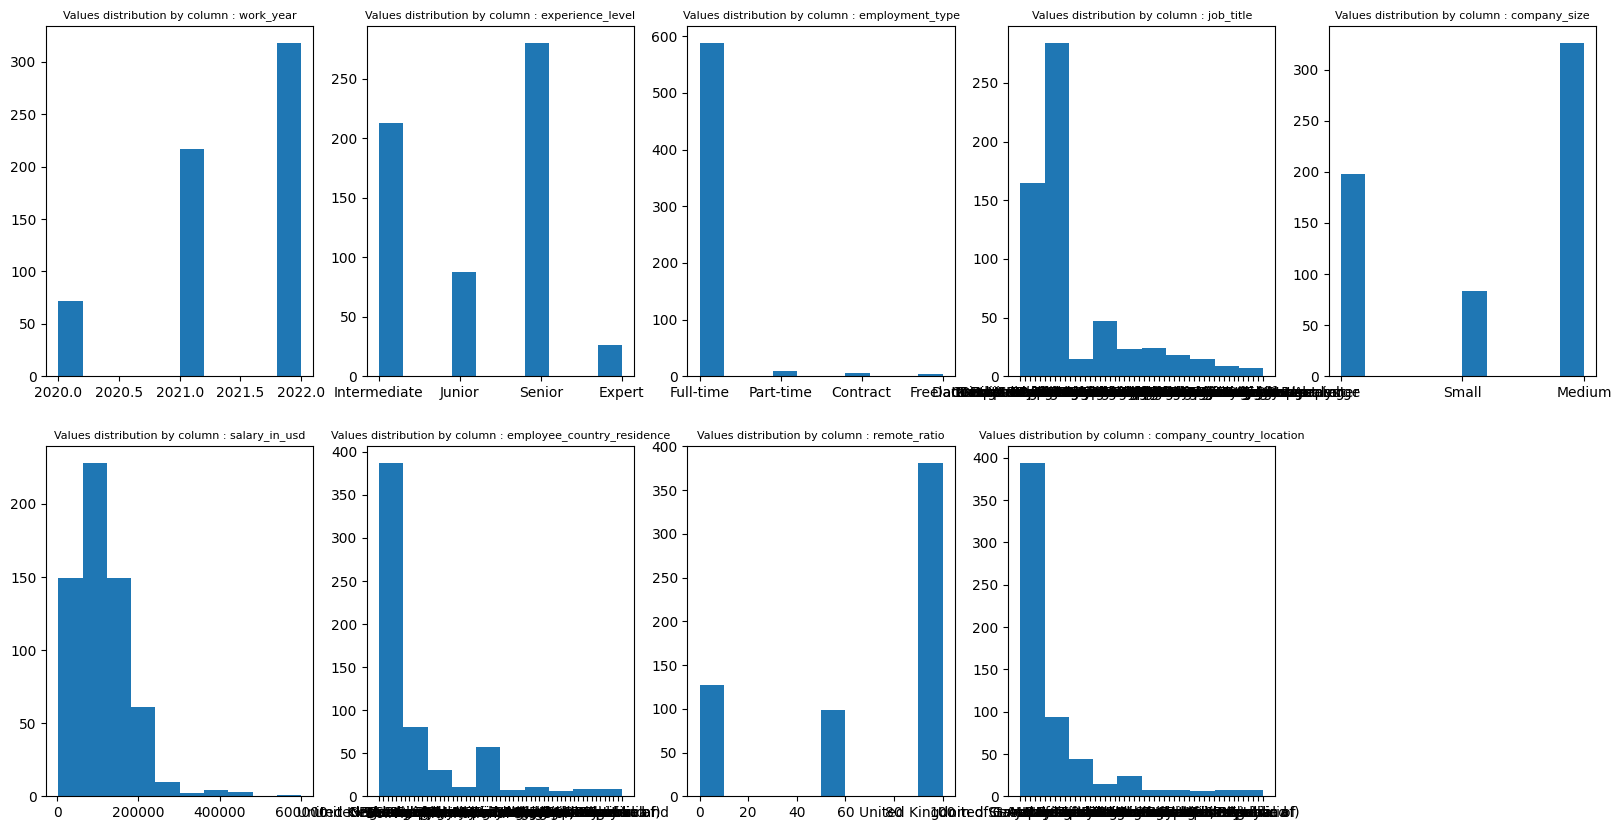

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
for index,column in enumerate(df_work_clean):
    plt.subplot(2,5,index+1)
    plt.hist(df_work_clean[column])
    plt.title(f'Values distribution by column : {column}', fontsize=8)
plt.show()

# JE REMARQUE 2 POINTS IMPORTANT
# 1) LA TRÈS GRANDES MAJORITÉS DES PERSONNES QUI ONT RENSEIGNÉS LEUR SALAIRE DANS LA DATABASE OCCUPE UN POSTE À PLEIN TEMPS.
# 2) LA DISTRIBUTIONS DES SALAIRES EN DOLLARS SEMBLENT PROCHE DU DISTRIBUTIONS NORMALES, MAIS EXCENTRÉ VERS LA GAUCHE


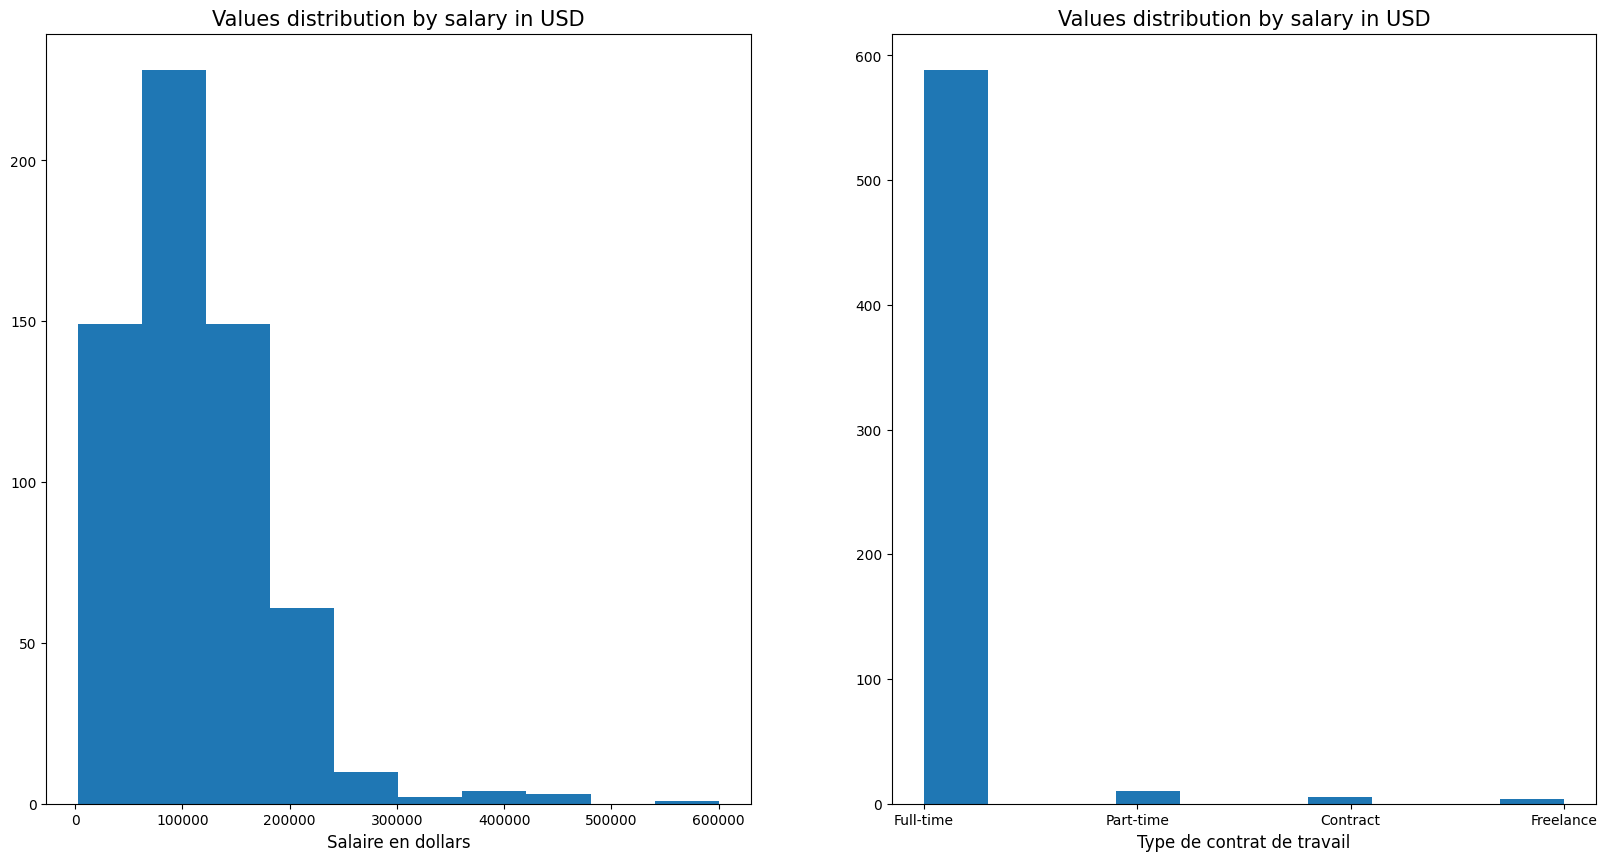

In [14]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(df_work_clean.salary_in_usd)
plt.title(f'Values distribution by salary in USD', fontsize=15)
plt.xlabel('Salaire en dollars', fontsize=12)

plt.subplot(1,2,2)
plt.hist(df_work_clean.employment_type)
plt.title(f'Values distribution by salary in USD', fontsize=15)    
plt.xlabel('Type de contrat de travail', fontsize=12)    
plt.show()


# 2.1 DATA CLEANING, 2EME PARTIE 
---

# JE DECIDE DONC DE SUPPRIMER LES LIGNES OU LES SALAIRES DEPASSENT 250k$/an ET DE NE GARDER QUE LES EMPLOIS À PLEIN TEMPS
# JE CONSIDÈRE LES AUTRES VALEURS PEUT SIGNIFICATIVES POUR EFFECTUER MES PREDICTIONS

In [15]:
regression_df = df_work_clean.loc[(df_work_clean["salary_in_usd"] <= 250000) & (df_work_clean["employment_type"] == "Full-time")]
regression_df

,work_year,experience_level,employment_type,job_title,company_size,salary_in_usd,employee_country_residence,remote_ratio,company_country_location
0,2020,Intermediate,Full-time,Data Scientist,Large,79833,Germany,0,Germany
1,2020,Intermediate,Full-time,Data Engineering Manager,Small,59303,Germany,100,Germany
3,2020,Senior,Full-time,Principal Data Scientist,Medium,148261,Germany,100,Germany
4,2020,Junior,Full-time,Data Scientist,Small,62726,Germany,50,Germany
5,2020,Junior,Full-time,Data Scientist,Small,49268,Germany,0,Germany
...,...,...,...,...,...,...,...,...,...
602,2022,Intermediate,Full-time,Head of Data,Small,32974,Estonia,100,Estonia
603,2022,Intermediate,Full-time,Machine Learning Engineer,Large,87425,Australia,100,Australia
604,2022,Junior,Full-time,Data Scientist,Medium,86703,Australia,50,Australia
605,2022,Junior,Full-time,Computer Vision Software Engineer,Small,150000,Australia,100,Australia


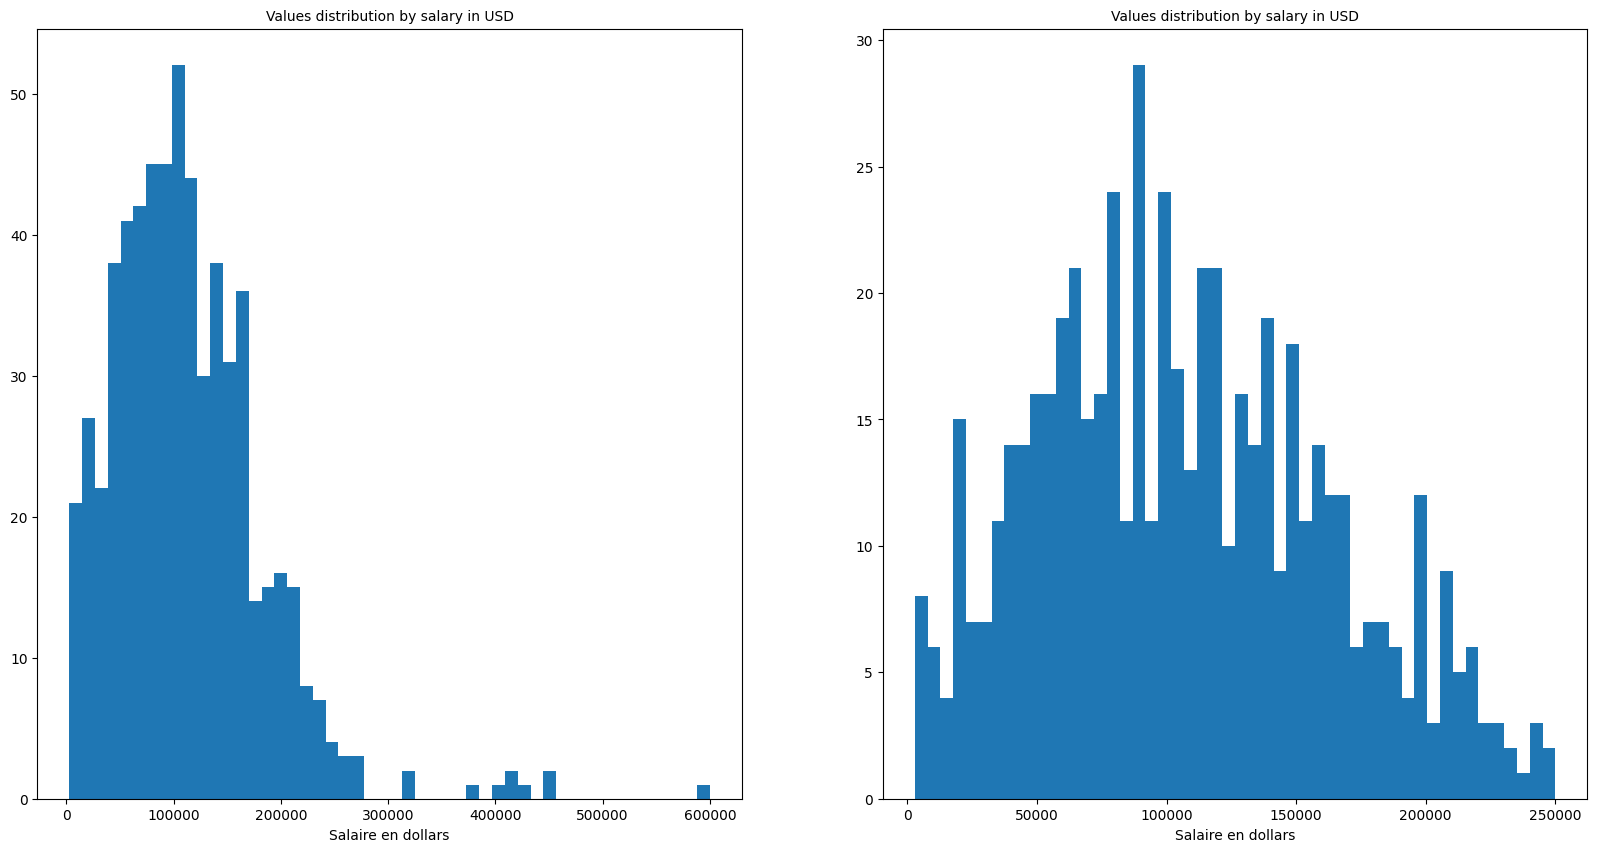

In [16]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.hist(df_work_clean.salary_in_usd, bins=50)
plt.title(f'Values distribution by salary in USD', fontsize=10)
plt.xlabel('Salaire en dollars')

plt.subplot(1,2,2)
plt.hist(regression_df.salary_in_usd, bins=50)
plt.title(f'Values distribution by salary in USD', fontsize=10)    
plt.xlabel('Salaire en dollars')    

plt.show()

# LE DATAFRAME OBTENU PERMETTRA EN THEORIE D'OBTENIR UN MEILLEUR MODELE APRES ENTRAINEMENT

# 3.1 REGRESSION LINEAIRE, 1ERE ITÉRATION
---

# JE FIT UNE PREMIERE REGRESSION LINEAIRE AVEC MON DATASET : 
# TARGET => 'salary_in_dollar'
# FEATURE => 'company_country_location'

# JE COMMENCE PAR METTRE TOUTES LES VALEURS CATÉGORIELLES EN STRING

In [17]:
regression_df = regression_df.drop(['work_year', 'employment_type'], axis=1)
regression_df['salary_in_usd'] = regression_df['salary_in_usd'].apply(lambda x : float(x))
regression_df['remote_ratio'] = df['remote_ratio'].apply(lambda x : str(x))
regression_df

,experience_level,job_title,company_size,salary_in_usd,employee_country_residence,remote_ratio,company_country_location
0,Intermediate,Data Scientist,Large,79833.0,Germany,0,Germany
1,Intermediate,Data Engineering Manager,Small,59303.0,Germany,0,Germany
3,Senior,Principal Data Scientist,Medium,148261.0,Germany,0,Germany
4,Junior,Data Scientist,Small,62726.0,Germany,50,Germany
5,Junior,Data Scientist,Small,49268.0,Germany,100,Germany
...,...,...,...,...,...,...,...
602,Intermediate,Head of Data,Small,32974.0,Estonia,100,Estonia
603,Intermediate,Machine Learning Engineer,Large,87425.0,Australia,100,Australia
604,Junior,Data Scientist,Medium,86703.0,Australia,0,Australia
605,Junior,Computer Vision Software Engineer,Small,150000.0,Australia,100,Australia


In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


y = regression_df[['salary_in_usd']]
X = regression_df[['job_title','company_size','company_country_location','experience_level','employee_country_residence','remote_ratio']]


X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train)
pd.DataFrame.sparse.from_spmatrix(X_train_ohe)


X_test_ohe = ohe.transform(X_test)
pd.DataFrame.sparse.from_spmatrix(X_test_ohe)

lr = LinearRegression()
lr.fit(X_train_ohe, y_train)
print(f" test score  : {lr.score(X_test_ohe, y_test)}")

 test score  : 0.5542201655609807


# JE VOUS EPARGNE TOUS LES TESTE, LE MEILLEUR RESULTAT EST OBTENU AVEC 6 FEATURES
# JE DECIDE DE NE PAS UTILISER LA FEATURES DE L'ANNÉE DE TRAVAIL CAR PEUT PERTINENTE ET INADAPTÉ SI JE VEUX FAIRE DES PREDICTIONS SUR 2023 (work_year = 2020/2021/2022)

# 3.2 DATA CLEANING PART 3

# PAR SOUCIS DE PERFORMANCE DE MON MODÈLE, JE DECIDE DE SUPPRIMER LES OUTLIERS DE MES CATÉGORIES 'job_title', 'employee_country_residence','company_country_location'

In [19]:
regression_df.job_title.value_counts().head(24)
#Meme en supprimer la moitié des métier, il me reste 92% de mon dataframe

Data Scientist                138
Data Engineer                 128
Data Analyst                   96
Machine Learning Engineer      41
Research Scientist             15
Data Science Manager           12
Data Architect                 10
Big Data Engineer               8
Data Science Consultant         7
Data Analytics Manager          7
Principal Data Scientist        6
Director of Data Science        6
Machine Learning Scientist      6
BI Data Analyst                 6
Data Engineering Manager        5
Head of Data                    5
Lead Data Engineer              5
AI Scientist                    5
Analytics Engineer              4
Business Data Analyst           4
Applied Data Scientist          4
Data Analytics Engineer         4
Computer Vision Engineer        4
Head of Data Science            4
Name: job_title, dtype: int64

# EN EFFECTUANT QUELQUES TESTS, JE ME RENDS COMPTE QUE CERTAINES VALEURS UNIQUES DE CES CATÉGORIES SONT TRES PEU REPRÉSENTÉ DANS MON DATAFRAME, ELLES SERONT PAR CONSÉQUENT TRES COMPLEXE À PREVOIR ET RISQUE DE DILUER LA PRECISION DES PREDICTIONS SUR LES AUTRES VALEURS UNIQUES
# JE DECIDE DONC D'ENLEVER TOUS LES MÉTIERS QUI APPARAISSENT MOINS DE 4 FOIS DANS LE DATAFRAME
# J'APPLIQUE LE MÊME PRINCIPES AUX 2 AUTRES COLONNES

In [180]:
most_job_appear = regression_df.job_title.value_counts()[:24].index.tolist()
regression_df_2 = regression_df.loc[regression_df['job_title'].isin(most_job_appear)]
most_employee_country_residence = regression_df_2.employee_country_residence.value_counts()[:13].index.tolist()
regression_df_2 = regression_df_2.loc[regression_df['employee_country_residence'].isin(most_employee_country_residence)]
most_company_country_location = regression_df_2.company_country_location.value_counts()[:8].index.tolist()
regression_df_2 = regression_df_2.loc[regression_df_2['company_country_location'].isin(most_company_country_location)]
regression_df_2

,experience_level,job_title,company_size,salary_in_usd,employee_country_residence,remote_ratio,company_country_location
0,Intermediate,Data Scientist,Large,79833.0,Germany,0,Germany
1,Intermediate,Data Engineering Manager,Small,59303.0,Germany,0,Germany
3,Senior,Principal Data Scientist,Medium,148261.0,Germany,0,Germany
4,Junior,Data Scientist,Small,62726.0,Germany,50,Germany
5,Junior,Data Scientist,Small,49268.0,Germany,100,Germany
...,...,...,...,...,...,...,...
552,Intermediate,Data Engineer,Medium,87932.0,Greece,100,Greece
553,Intermediate,Data Analyst,Medium,43966.0,Greece,100,Greece
554,Intermediate,Data Analyst,Medium,32974.0,Greece,100,Greece
555,Intermediate,Data Engineer,Medium,76940.0,Greece,100,Greece


# CETTE OPERATION FAIT PASSER LE DATAFRAME DE 574 LIGNES À 454 LIGNES, MAIS LE NOMBRE DE VALEURS UNIQUES TOTALES À ÉTÉ DIVISÉ PAR PLUS DE 2, NOUS DEVRIONS TROUVÉ DE MEILLEURS RESULTATS EN THÉORIE

In [209]:
y_2 = regression_df_2[['salary_in_usd']]
X_2 = regression_df_2[['job_title','company_size','company_country_location','experience_level','employee_country_residence','remote_ratio']]


X_train_2,X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3)


ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train_2)
X_train_ohe_2 = ohe.transform(X_train_2)
pd.DataFrame.sparse.from_spmatrix(X_train_ohe_2)


X_test_ohe_2 = ohe.transform(X_test_2)
pd.DataFrame.sparse.from_spmatrix(X_test_ohe_2)

lr = LinearRegression()
lr.fit(X_train_ohe_2, y_train_2)
print(f" test score : {lr.score(X_test_ohe_2, y_test_2)}")

 test score : 0.6084243278932373


In [211]:
from sklearn.model_selection import cross_validate

cv = cross_validate(lr, X_train_ohe, y_train, cv=5)['test_score'].mean()
cv2 = cross_validate(lr, X_train_ohe_2, y_train_2, cv=5)['test_score'].mean()
print(f"mean score cross  : {cv}\nmean score cross 2: {cv2}")

mean score cross  : 0.4817738729586526
mean score cross 2: 0.42970148490050386


# CE N'EST PAS EXCEPTIONNEL, MAIS C'EST LE MEILLEUR SCORE QUE J'AI REUSSI À OBTENIR, J'AI TESTER PAS MAL D'AUTRE SYSTEME D'ENCODAGE ("Binary Encoding","Ordinal Encoding" et "Label Encoding")
# J'AI DONC CHOISI DE METTRE TOUT DE MÊME CE MODELE EN PRODUCTION, J'AI DONC CHOISI DE L'ENTRAINÉ AVEC LE 2EME DATAFRAME.
# JE CRÉE UN PIPELINE POUR SIMPLIFIER LA MISE EN PLACE ET LE DÉPLOIEMENT DE MON MODÈLE, JE FIT ENSUITE MON MODELE AVEC TOUT MON DATAFRAME.

In [212]:
from sklearn.pipeline import Pipeline
from sklearn import set_config


transformer = OneHotEncoder(handle_unknown='ignore')
                        
pipeline_workflow = Pipeline([('preprocessing_tranformer', transformer), 
                             ('linear', LinearRegression())])

my_final_model = pipeline_workflow.fit(X_2,y_2)
set_config()
my_final_model

Pipeline(steps=[('preprocessing_tranformer',
                 OneHotEncoder(handle_unknown='ignore')),
                ('linear', LinearRegression())])

# J'ENREGISTRE ENSUITE CE MODELE POUR POUVOIR LE DEPLOYER DANS UNE API

In [213]:
import pickle

outfile = open("api/data_salary_prediction_model.plk", 'wb')
pickle.dump(my_final_model, outfile)
outfile.close()


# BONUS : JE TESTE LE MODELE ICI

In [214]:
with open("api/values_prediction_instructions.txt", 'w') as f:
    content = ""
    for column in X_2.columns:
        content += f"Colonne : '{column}'\n\nvaleur possible : {regression_df_2[column].unique()}\n\n"
    f.write(content)

In [216]:
def make_predict_df(job_title, company_size, company_country_location, experience_level, employee_country_residence, remote_ratio):
    predict_df = pd.DataFrame({'job_title': [job_title],
                               'company_size': [company_size],
                               'company_country_location': [company_country_location],
                               'experience_level': [experience_level],
                               'employee_country_residence': [employee_country_residence],
                               'remote_ratio': [remote_ratio]
                               })
    return predict_df

features_df = make_predict_df('Data Analyst', "Large", "France", "Intermediate" ,"France", "0")
int(my_final_model.predict(features_df ))


38131